In [1]:
from google.colab import drive
drive.mount('/content/drive')

# Drive'daki proje klasörünüzün yolunu belirtin:
# Örneğin: /content/drive/MyDrive/FederatedFlowGAN-PM
PROJECT_DRIVE_PATH = '/content/drive/MyDrive/FederatedFlowGAN-PM'

# Colab yerel dosya sistemine kopyala
!cp -r "{PROJECT_DRIVE_PATH}" /content/FederatedFlowGAN-PM

# Çalışma dizinini proje klasörüne değiştir
%cd /content/FederatedFlowGAN-PM


Mounted at /content/drive
/content/FederatedFlowGAN-PM


In [2]:
!pip install -U pyro-ppl


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 122.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 99.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 65.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 109.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninst

In [3]:
!pip install nflows


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for nflows: filename=nflows-0.14-py3-none-any.whl size=53654 sha256=d1b1f3baf87f689e86330853a581ab227db27d8498e3df10ef50bd36b87518bd
  Stored in directory: /root/.cache/pip/wheels/11/9d/b5/5c88631a7bdb388738d147b6a28ba435ab969f25eff552f75a
Successfully built nflows


In [4]:
!pip install torch torchvision --extra-index-url https://download.pytorch.org/whl/cu121
!pip install flwr pyro-ppl[torch] transformers pandas scikit-learn scipy


Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu121
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.0/540.0 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 98.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 88.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.0/236.0 kB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.4
    Uninstalling protobuf-5.29.4:
      Successfully uninstalled protobuf-5.29.4
  Attempting uninstall: cryptography
    Found existing installation: cryptography 43.0.3
    Uninstalling cryptography-43.0.3:
      Successfully uninstalled cryptography-43.0.3
  Attempting uninstall: typer
    Found existing installation: typer 0.15.3
    Uninstalling typer-

In [5]:
# src/ içindeki .py dosyalarının orada olduğunu doğrulayın
!ls src


config.py	       federated_server.py  tranformer_fc.py
data_preprocessing.py  flow_module.py	    utils.py
evalution.py	       __init__.py	    wgan_gp.py


In [ ]:
python src/data_preprocessing.py \
  --input_dir data/raw \
  --output_dir data/processed \
  --seq_len 200


In [6]:
!python src/wgan_gp.py --processed_dir data/processed --max_segments 100000


✅ Segment sayısı: 100000 (toplam raw: 965328), segment shape: (200, 4)
🚀 WGAN-GP eğitimi başlıyor...
/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py:823: UserWarning: Attempting to run cuBLAS, but there was no current CUDA context! Attempting to set the primary context... (Triggered internally at /pytorch/aten/src/ATen/cuda/CublasHandlePool.cpp:180.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
📈 Epoch 1/50  D_loss: -0.9941  G_loss: 0.5361
📈 Epoch 2/50  D_loss: -0.9879  G_loss: 0.9176
📈 Epoch 3/50  D_loss: -0.9391  G_loss: 0.9096
📈 Epoch 4/50  D_loss: -0.9404  G_loss: 0.6302
📈 Epoch 5/50  D_loss: -0.8914  G_loss: 0.4932
📈 Epoch 6/50  D_loss: -0.9410  G_loss: 0.6543
📈 Epoch 7/50  D_loss: -0.9193  G_loss: 0.4695
📈 Epoch 8/50  D_loss: -0.9396  G_loss: 0.4468
📈 Epoch 9/50  D_loss: -0.9341  G_loss: 0.5714
📈 Epoch 10/50  D_loss: -0.9621  G_loss: 0.5854
📈 Epoch 11/50  D_loss: -0.9711  G_loss: 0.7285
📈 Epoch 12/50  D_lo

In [7]:
!python src/compare_wgan_real.py

Figure(1600x2000)
✅ Karşılaştırma görseli 'wgan_real_vs_fake.png' olarak kaydedildi.


In [15]:
!python src/evaluate_gan_metrics.py

[+] Real örnek: (5000, 200, 4), Fake örnek: (5000, 200, 4)

🔹 MMD (RBF kernel): 0.008124
🔹 Classification AUC: ROC = 0.9996, PR = 0.9996

Channel | real_mean | fake_mean | mean_diff | real_std | fake_std | std_diff
  Ch1    -0.0524     -0.1125      0.0601      0.1115      0.0946      0.0169
  Ch2    -0.0524     -0.1149      0.0625      0.1061      0.0867      0.0194
  Ch3    -0.0522     -0.1135      0.0613      0.1050      0.0885      0.0165
  Ch4    -0.0524     -0.1126      0.0602      0.0878      0.0719      0.0160


In [19]:
!python src/flow_module_real.py --processed_dir data/processed --max_segments 100000

📂 Segmentlere ayırma başlıyor...
  • 1st_test_arr.npy: (2156, 20480, 8)
  • 2nd_test_arr.npy: (984, 20480, 4)
  • 3rd_test_arr.npy: (6324, 20480, 4)
▶️ Toplam raw segment: 965328
▶️ 100000 segment rastgele seçildi.
✅ Kullanılacak segment sayısı: 100000, shape: (200, 4)
🚀 RealNVP (gerçek veri) eğitimi başlıyor...
  Epoch 1/50  Loss: -739.6275
  Epoch 2/50  Loss: -981.0632
  Epoch 3/50  Loss: -1004.8410
  Epoch 4/50  Loss: -1022.9082
  Epoch 5/50  Loss: -1040.3371
  Epoch 6/50  Loss: -1056.5361
  Epoch 7/50  Loss: -1070.9270
  Epoch 8/50  Loss: -1083.0178
  Epoch 9/50  Loss: -1093.1916
  Epoch 10/50  Loss: -1101.8261
  Epoch 11/50  Loss: -1108.9782
  Epoch 12/50  Loss: -1115.0811
  Epoch 13/50  Loss: -1120.5990
  Epoch 14/50  Loss: -1125.0822
  Epoch 15/50  Loss: -1129.2641
  Epoch 16/50  Loss: -1133.0515
  Epoch 17/50  Loss: -1136.4353
  Epoch 18/50  Loss: -1139.4664
  Epoch 19/50  Loss: -1142.5064
  Epoch 20/50  Loss: -1145.2703
  Epoch 21/50  Loss: -1147.9770
  Epoch 22/50  Loss: -115

In [21]:
!python src/evaluate_real_data.py \
  --processed_dir data/processed \
  --model_path realnvp_real.pth \
  --max_segments 100000


Figure(1000x400)


In [26]:
!python src/filter_sensor_real_anomalies.py \
  --processed_dir data/processed \
  --score_csv sensor_real_scores.csv \
  --percentile 95 \
  --max_segments 100000


📂 Gerçek segmentler yükleniyor ve pencereleniyor…
▶️ 100000 segment rastgele seçildi (raw: 965328)
⚡ 95.0. percentile eşik değeri: -945.41
Figure(800x400)
   Histogram kaydedildi: sensor_score_histogram.png
✅ Anomali segment sayısı: 5000
✅ Normal segment sayısı: 95000
   sensor_anomalies.npy ve sensor_normals.npy oluşturuldu.


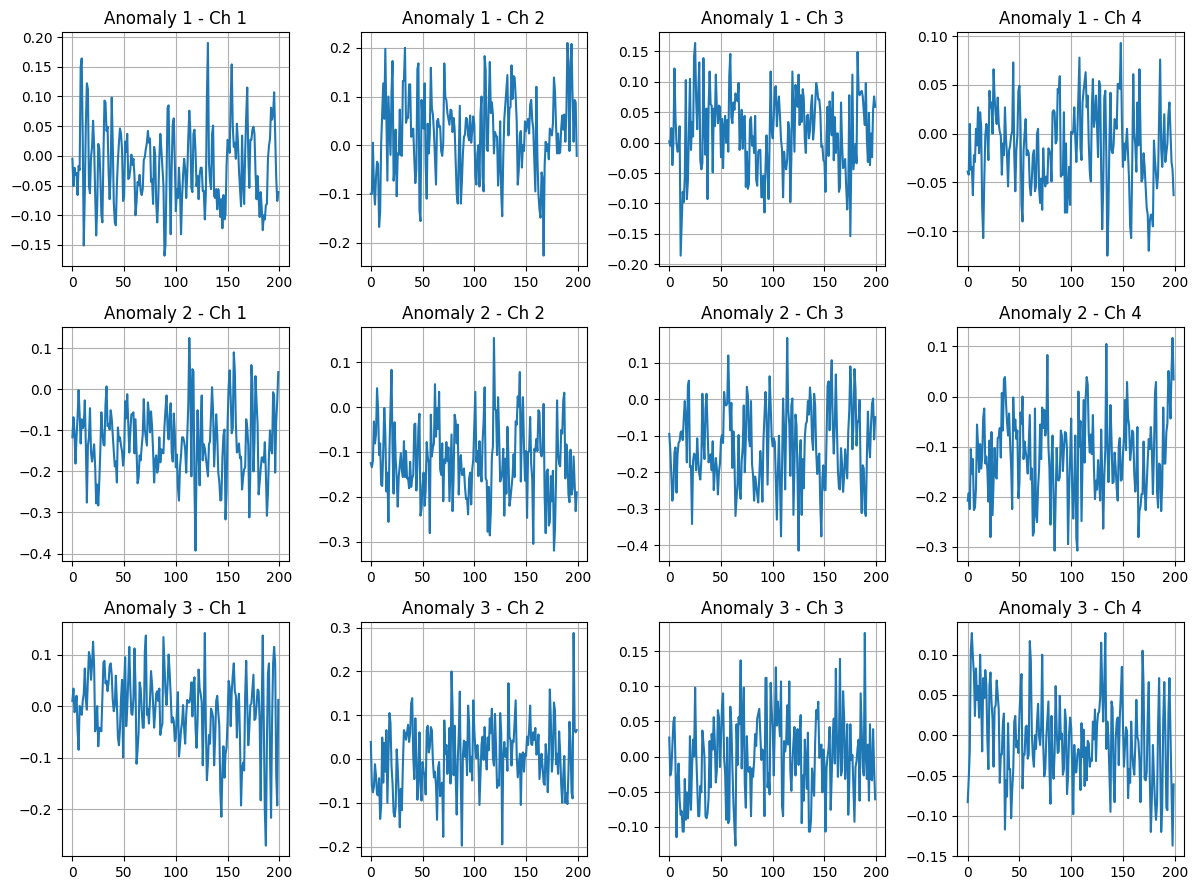

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# anomaly dosyasını yükle (path’i kendi dizinine göre güncelle)
anomalies = np.load("/content/FederatedFlowGAN-PM/sensor_anomalies.npy")

# İlk 3 anomalinin tüm 4 kanalını çiz
num_to_plot = 3
plt.figure(figsize=(12, num_to_plot * 3))
for i in range(num_to_plot):
    for c in range(anomalies.shape[2]):
        ax = plt.subplot(num_to_plot, anomalies.shape[2], i * anomalies.shape[2] + c + 1)
        ax.plot(anomalies[i, :, c])
        ax.set_title(f"Anomaly {i+1} - Ch {c+1}")
        ax.grid(True)
plt.tight_layout()
plt.savefig("sample_anomalies.png")
plt.show()

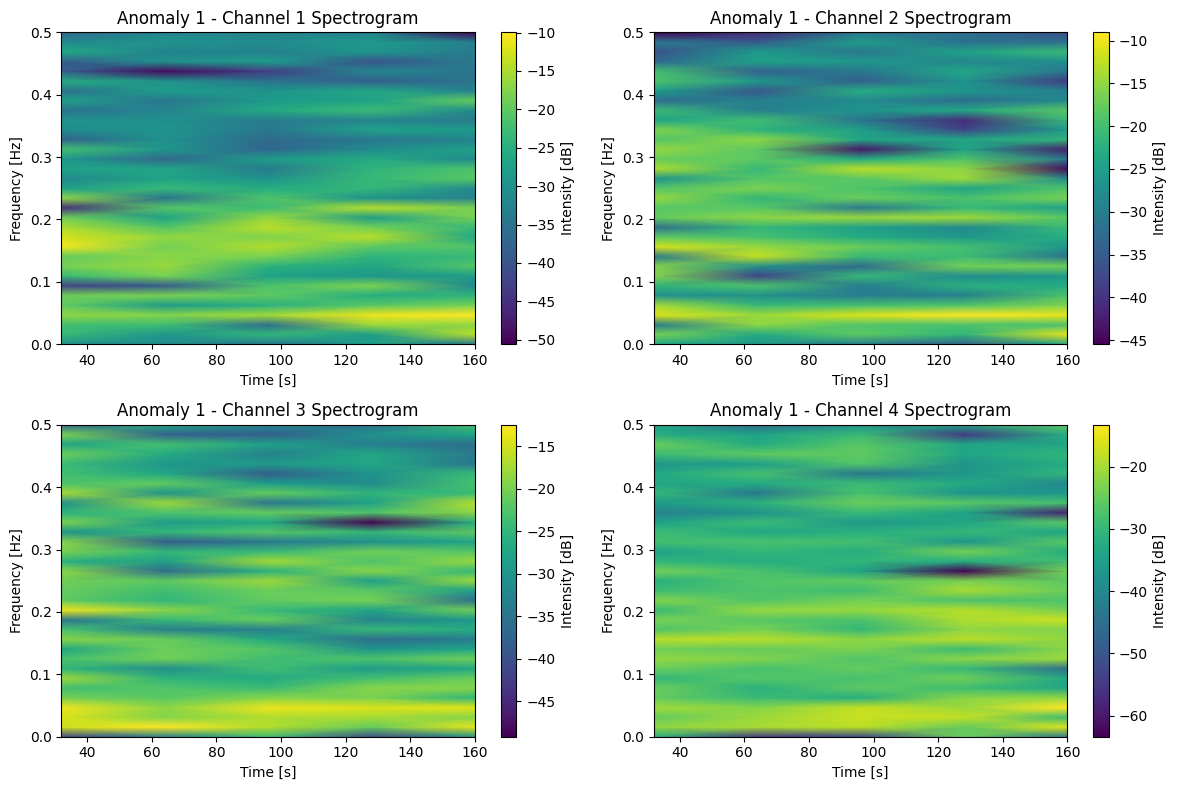

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# 1) Anomali dosyasının doğru yolunu verin
#    Örneğin Colab'da: "/content/FederatedFlowGAN-PM/sensor_anomalies.npy"
anomaly_file = "sensor_anomalies.npy"  # Gerekirse tam yoluyla değiştirin
anomalies = np.load(anomaly_file)      # shape: (5000, 200, 4)

# 2) İlk anomalinin verisini al
anomaly = anomalies[0]  # (200,4)

# 3) Spectrogram için örnekleme frekansı (birim zamanda kaç örnek)
fs = 1.0  # Zaman ölçeğiniz varsa burayı gerçek Hz olarak güncelleyebilirsiniz

# 4) Her kanal için spectrogram çiz
plt.figure(figsize=(12, 8))
for c in range(anomaly.shape[1]):
    f, t, Sxx = signal.spectrogram(
        anomaly[:, c], fs=fs, nperseg=64, noverlap=32
    )
    plt.subplot(2, 2, c+1)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx + 1e-10), shading='gouraud')
    plt.title(f"Anomaly 1 - Channel {c+1} Spectrogram")
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [s]')
    plt.colorbar(label='Intensity [dB]')

plt.tight_layout()
plt.savefig("anomaly_spectrograms.png")
plt.show()


In [38]:
!python src/save_generated_npy.py --num_samples 100000


✅ 100000 adet sentetik segment 'generated_data.npy' olarak kaydedildi.


In [52]:
!python src/merge_and_save.py \
  --input_dir data/processed \
  --pattern "_test_arr.npy" \
  --out_file sensor_windows.npy


📥 Yükleniyor: data/processed/1st_test_arr.npy
📥 Yükleniyor: data/processed/2nd_test_arr.npy
📥 Yükleniyor: data/processed/3rd_test_arr.npy
✅ Birleştirildi: shape (9464, 20480, 4)
✅ Kaydedildi: sensor_windows.npy


In [40]:
!python src/transformer_fc.py

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
🚀 Transformer forecast eğitimi başlıyor...
  Epoch 1/50  MSE: 0.660844
  Epoch 2/50  MSE: 0.529341
  Epoch 3/50  MSE: 0.507446
  Epoch 4/50  MSE: 0.497751
  Epoch 5/50  MSE: 0.489253
  Epoch 6/50  MSE: 0.482875
  Epoch 7/50  MSE: 0.477578
  Epoch 8/50  MSE: 0.473051
  Epoch 9/50  MSE: 0.468908
  Epoch 10/50  MSE: 0.464932
  Epoch 11/50  MSE: 0.460681
  Epoch 12/50  MSE: 0.456422
  Epoch 13/50  MSE: 0.453015
  Epoch 14/50  MSE: 0.450258
  Epoch 15/50  MSE: 0.447703
  Epoch 16/50  MSE: 0.445485
  Epoch 17/50  MSE: 0.443420
  Epoch 18/50  MSE: 0.441472
  Epoch 19/50  MSE: 0.439641
  Epoch 20/50  MSE: 0.437764
  Epoch 21/50  MSE: 0.436266
  Epoch 22/50  MSE: 0.434617
  Epoch 23/50  MSE: 0.433058
  Epoch 24/50  MSE:

In [57]:
!python src/generate_forecast_predictions.py

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
✅ Tahminler üretildi: (1065328, 50, 4), Gerçekler: (1065328, 50, 4)
✅ 'forecast_pred.npy' ve 'forecast_true.npy' dosyaları kaydedildi.
